In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_excel('Задание_1.xlsx')

In [3]:
df

,ID,Year,Default,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
0,1,1999,0,0.500799,0.306846,0.043373,0.956271,0.334774
1,1,2000,0,0.547780,0.322214,0.051843,1.064545,0.334591
2,1,2001,0,0.451001,0.225150,0.026813,0.804096,0.245585
3,1,2002,0,0.306887,0.191936,0.030058,0.387010,0.253438
4,1,2003,0,0.447246,0.217368,0.032458,0.791639,0.275531
...,...,...,...,...,...,...,...,...
3995,826,1997,1,0.028728,-1.846117,0.033956,0.034680,0.678044
3996,827,2000,1,0.172167,-0.068613,-0.004699,0.043519,0.235299
3997,828,1996,1,0.005588,-0.260068,0.036878,0.298255,0.148100
3998,829,2001,1,-0.994230,-0.433532,-0.000244,0.035502,0.330467


In [4]:
df.isnull().mean()

ID         0.0
Year       0.0
Default    0.0
WC/TA      0.0
RE/TA      0.0
EBIT/TA    0.0
ME/TL      0.0
S/TA       0.0
dtype: float64

Пропусков в данных нет

# Описание данных

1) **Year** - год наблюдения

2. **WC/TA** - working capital / total assets

3. **RE/TA** - retained earnings / total assets

4. **EBIT/TA** - earnings before interest and taxes / total assets

5. **S/TA** - savings / total assets 

Заметим, что для каждого ID представлены данные по нескольким годам, это нужно учитывать при анализе

# Исследование данных

In [6]:
df.describe()

,ID,Year,Default,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,356.336250,1999.828000,0.018000,0.142514,0.210467,0.051803,1.953963,0.303652
std,198.098395,2.754054,0.132968,0.170763,0.332549,0.029596,2.994475,0.205794
min,1.000000,1995.000000,0.000000,-2.240268,-3.312420,-0.591821,0.023718,0.035858
25%,192.000000,1998.000000,0.000000,0.031167,0.094744,0.038992,0.623493,0.170836
50%,358.000000,2000.000000,0.000000,0.117273,0.218929,0.051563,1.136456,0.261037
75%,521.000000,2002.000000,0.000000,0.241775,0.373417,0.065093,2.244287,0.366936
max,830.000000,2004.000000,1.000000,0.766040,1.639646,0.198035,60.607150,5.007775


Для того, чтобы лучше понять признаки, я изучил информацию о них и вот какие выводы по каждому из них удалось сделать:

### WC / TA

Соотношение **оборотного капитала к оборотным активам**

Указывает на способность бизнеса финансировать свои краткосрочные обязательства

Всегда <= 1

Нормальные значения коэффициента сильно зависят от отрасли.

При этом чем выше коэффициент - тем лучше

Отрицательное значение WC/TA говорит о том, что текущие активы превышают текущие обязательства. Это является признаком трудного финансового положения компании. При этом не всегда отрицательный коэффициент это плохо. Знак минус может появиться в ситуации, когда компания работает с низкой дебиторской задолженностью и эффективно использует кредиты поставщиков.

Заметим, что в нашей выборке среднее значение WC/TA довольно высокое, что свидетельствует о преобладании в выборке стабильных компаний.

### RE / TA

Отражает **долю активов, финансируемых за счёт нераспределённой прибыли бизнеса.**

Также коэффициент дает понять, насколько компания может финансировать свою деятельность за счёт внутренних ресурсов, то есть степень независимости от внешнего долга и вливаний капитала.

Чем выше RE/TA, тем лучше

Также важно отметить, что большинство начинающих компаний имеют небольшую нераспределенную прибыль, соответственно у них RE/TA будет низким. При этом если с каждым годом коэффициент растёт, то это значит, что компания укрепляет свои позиции на рынке и ее финансовое положение улучшается.

### EBIT/TA

Отражает, насколько **эффективно компания генерирует прибыль до уплаты процентов и налогов**

Коэффициент интересен для анализа тем, что при сравнении с компаниями из других стран разница в налоговых ставках не повлияет на анализ. Также не учитывается уплата процентов, значит различия в структуре капитала у разных компаний не скажутся на результатах анализа.

EBIT/TA дает представление о том, **сколько денег генерируется от каждого доллара, вложенного в компанию**

### ME/TL

Отражает **отношение рыночной стоимости собственного капитала к общей сумме долговых обязательств**.

Чем выше коэффициент, тем лучше, так как большое значение коэффициента говорит о том, что существенная часть финансирования компании происходит за счёт собственного капитала, а это говорит о финансовой независимости и стабильности.

### S/TA

Отражает **долю сбережений в общих активах компании**

Посмотрим на **распределение данных по классам**(1 - дефолт, 0 - нет дефолта)

<Axes: xlabel='Default'>

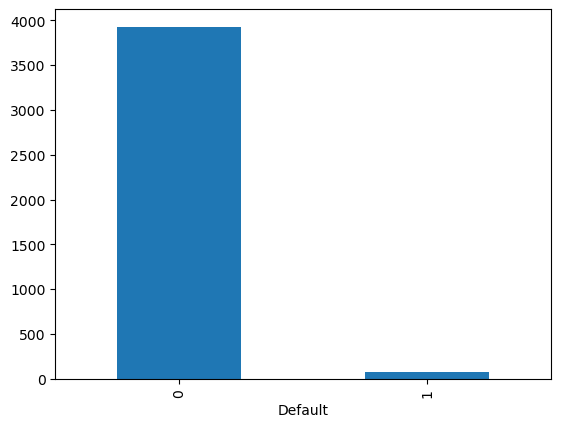

In [7]:
df['Default'].value_counts().plot(kind='bar')

В данной выборке наблюдается очень сильный дисбаланс классов. Я пробовал исследовать данные на выбросы по каждому признаку с помощью boxplot, искать и удалять выбросы методом интерквартильного размаха, но при этом ситуация с дисбалансом классов ухудшалась. По моему мнению это связано с тем, что нестандартно высокие/низкие значения коэффициентов как раз могут свидетельствовать о проблемах в компании, а следовательно, высокой вероятности дефолта. Поэтому я не чистил датасет от выбросов по признакам и оставил всё как есть. Построим модель на таких данных и затем посмотрим на её качество, чтобы убедиться, что всё правильно.

## Исследование влияния коэффициентов на дефолт

Чтобы посмотреть, при каких значениях каждого коэффициента чаще всего происходит дефолт, построим рядом гистограммы распределения значений каждого коэффициента в случаях дефолта / отсутствия дефолта

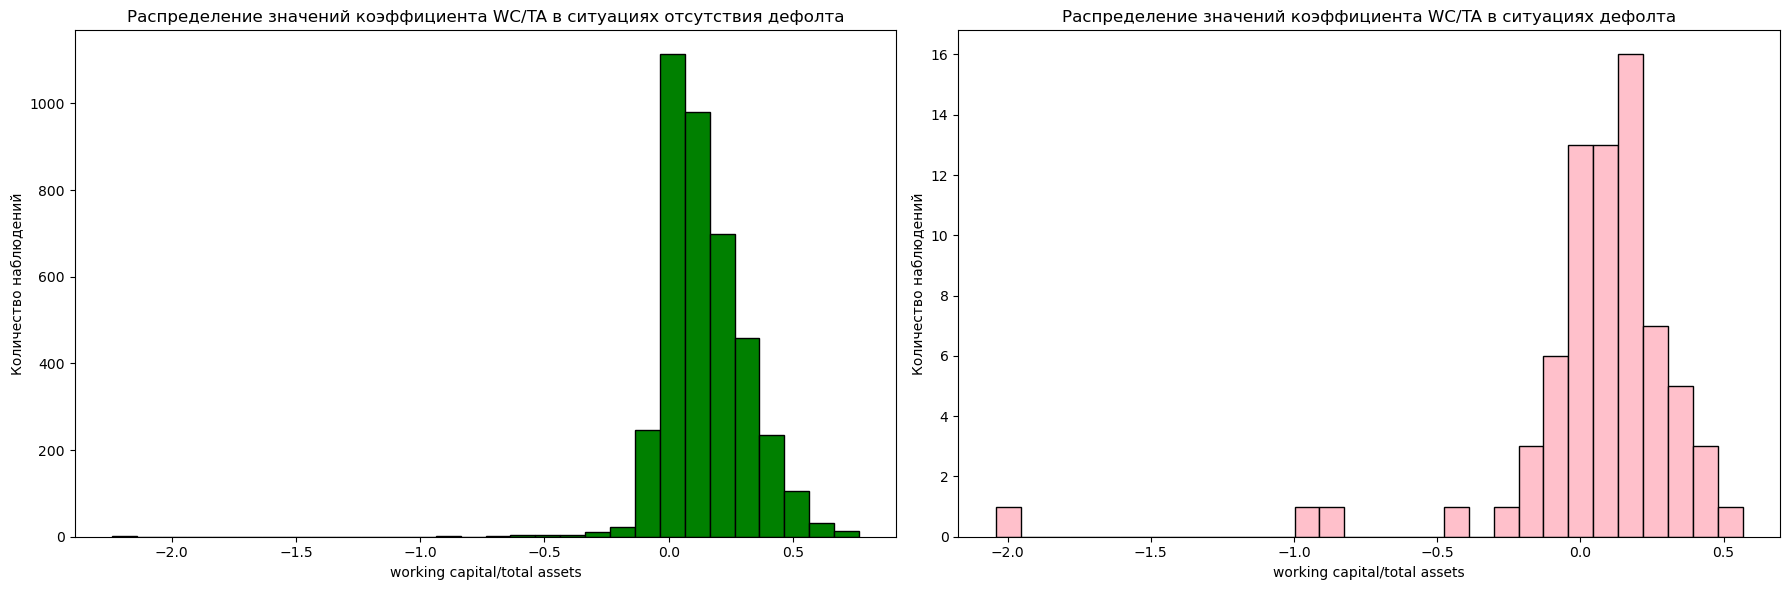

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
 
axes[0].hist(df[df['Default']==0]['WC/TA'], bins=30, color='Green', edgecolor='black')
axes[0].set_title('Распределение значений коэффициента WC/TA в ситуациях отсутствия дефолта')
 
axes[1].hist(df[df['Default']==1]['WC/TA'], bins=30, color='Pink', edgecolor='black')
axes[1].set_title('Распределение значений коэффициента WC/TA в ситуациях дефолта')
 
for ax in axes:
    ax.set_xlabel('working capital/total assets')
    ax.set_ylabel('Количество наблюдений')
 
plt.tight_layout()
plt.show()

По гистограммам хорошо видно, что распределение Wc/TA для наблюдений, когда произошел дефолт, смещено влево относительно распределения WC/TA, когда дефолта не было. Также в распределении с дефолтами больше выбросов, что логично.

In [9]:
df.loc[df['Default'] == 0, 'WC/TA'].mean()

0.14412271003054988

In [10]:
df.loc[df['Default'] == 1, 'WC/TA'].mean()

0.054731944444444444

Расчёт средних подтверждает наши наблюдения.

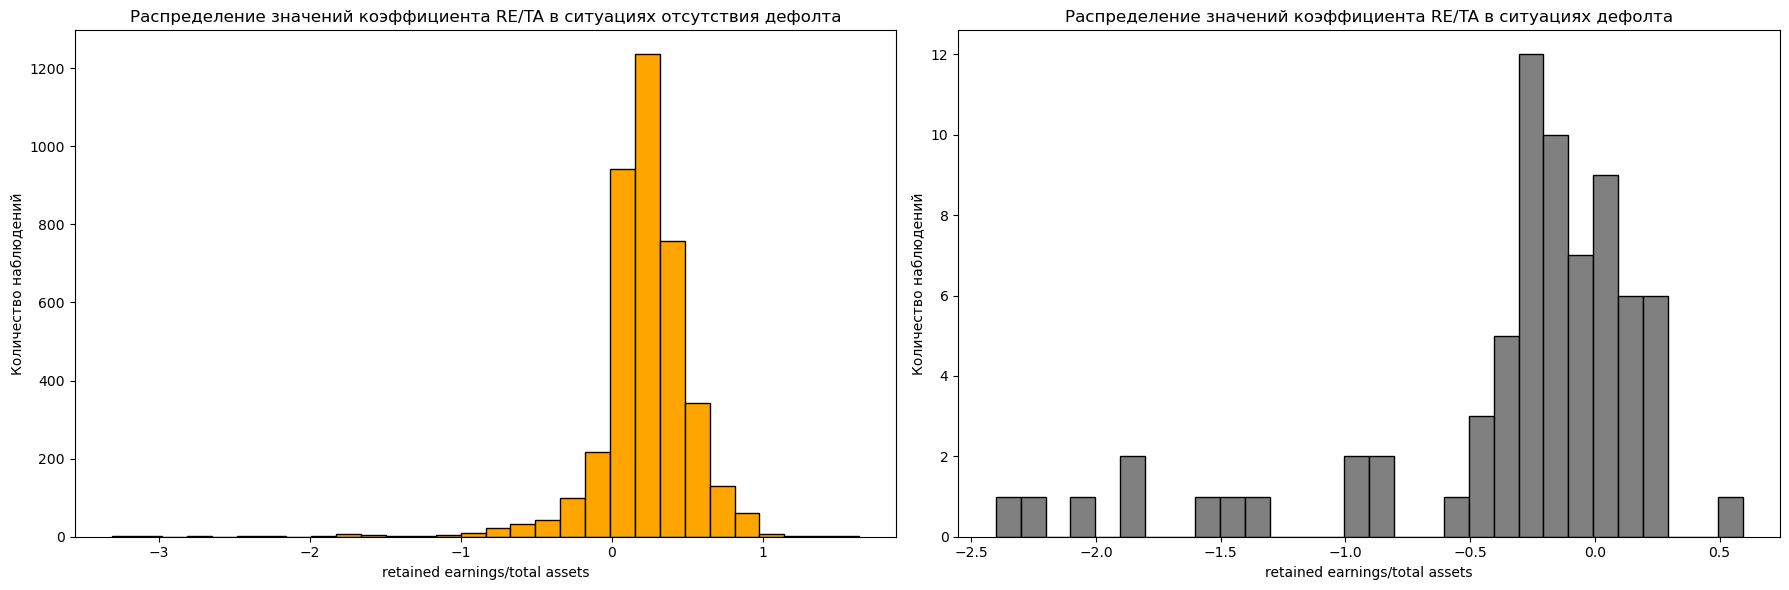

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
 
axes[0].hist(df[df['Default']==0]['RE/TA'], bins=30, color='orange', edgecolor='black')
axes[0].set_title('Распределение значений коэффициента RE/TA в ситуациях отсутствия дефолта')
 
axes[1].hist(df[df['Default']==1]['RE/TA'], bins=30, color='grey', edgecolor='black')
axes[1].set_title('Распределение значений коэффициента RE/TA в ситуациях дефолта')
 
for ax in axes:
    ax.set_xlabel('retained earnings/total assets')
    ax.set_ylabel('Количество наблюдений')
 
plt.tight_layout()
plt.show()

В случае коэффициента RE/TA ситуация ещё более наглядная. В наблюдениях с дефолтом много выбросов в левом хвосте, что говорит о важности этого показателя в предсказании дефолта(низкое значение RE/TA => высокая вероятность дефолта).

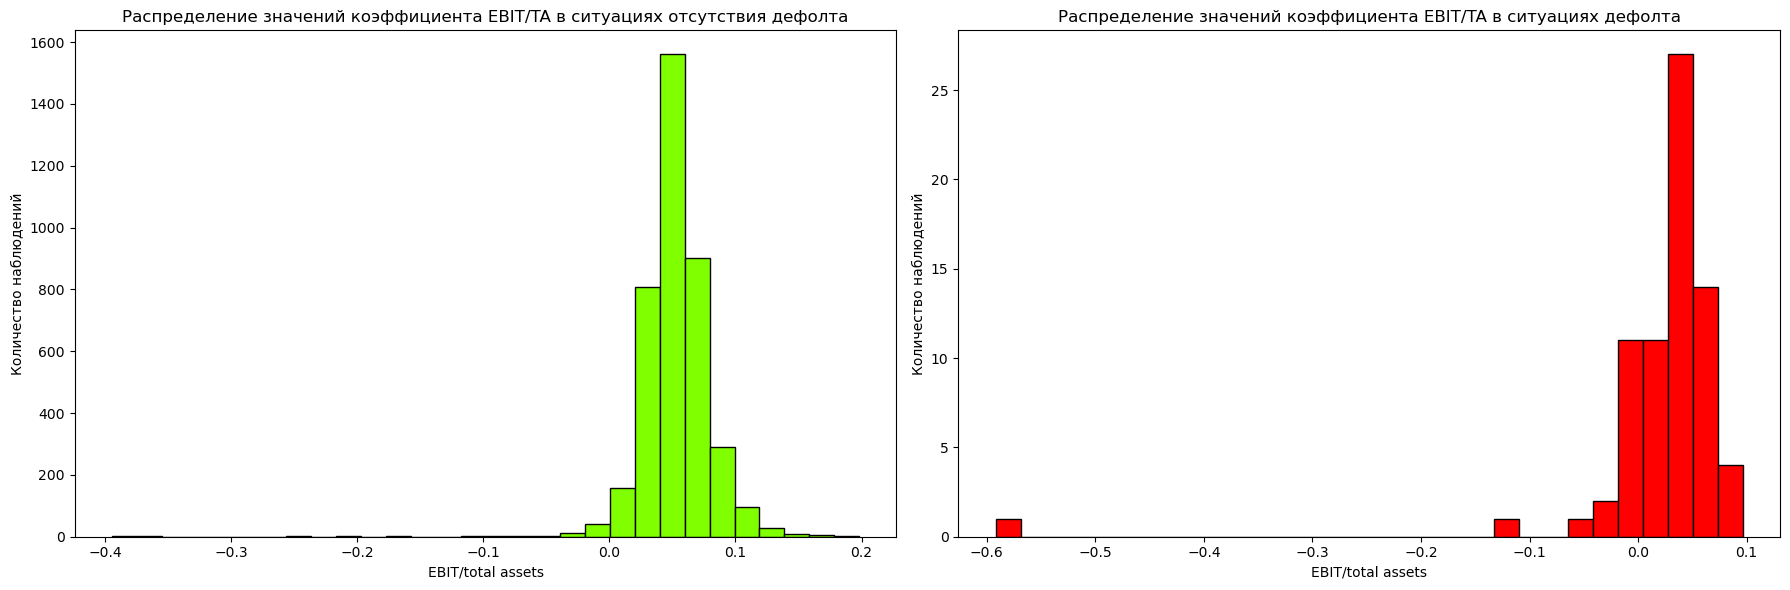

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
 
axes[0].hist(df[df['Default']==0]['EBIT/TA'], bins=30, color='chartreuse', edgecolor='black')
axes[0].set_title('Распределение значений коэффициента EBIT/TA в ситуациях отсутствия дефолта')
 
axes[1].hist(df[df['Default']==1]['EBIT/TA'], bins=30, color='red', edgecolor='black')
axes[1].set_title('Распределение значений коэффициента EBIT/TA в ситуациях дефолта')
 
for ax in axes:
    ax.set_xlabel('EBIT/total assets')
    ax.set_ylabel('Количество наблюдений')
 
plt.tight_layout()
plt.show()

У коэффициента EBIT/TA ситуация не такая явная, как мне кажется, это происходит потому, что как правило в компаниях EBIT небольшая. Скорее всего, этот коэффициент не так сильно как другие влияет на вероятность дефолта.

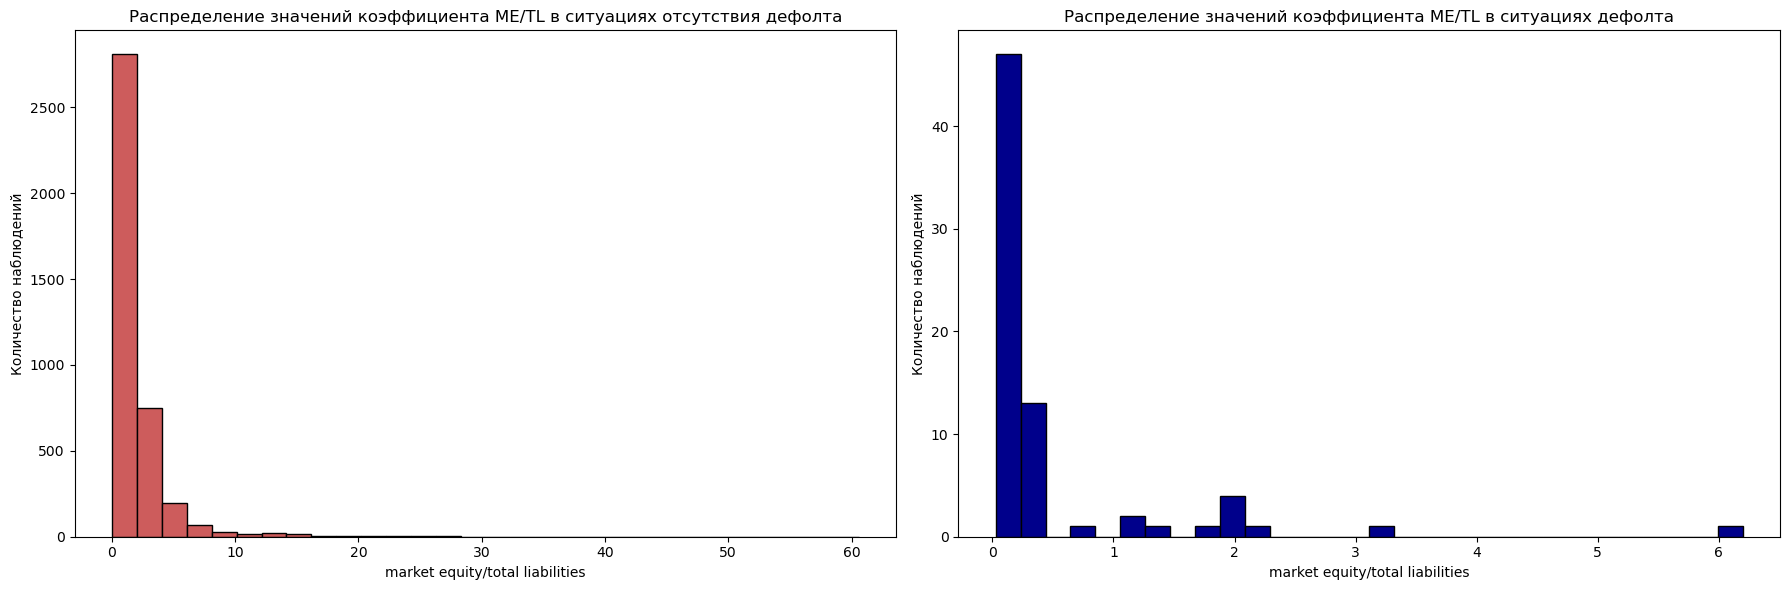

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
 
axes[0].hist(df[df['Default']==0]['ME/TL'], bins=30, color='indianred', edgecolor='black')
axes[0].set_title('Распределение значений коэффициента ME/TL в ситуациях отсутствия дефолта')
 
axes[1].hist(df[df['Default']==1]['ME/TL'], bins=30, color='darkblue', edgecolor='black')
axes[1].set_title('Распределение значений коэффициента ME/TL в ситуациях дефолта')
 
for ax in axes:
    ax.set_xlabel('market equity/total liabilities')
    ax.set_ylabel('Количество наблюдений')
 
plt.tight_layout()
plt.show()

Заметим, что в ситуациях дефолта коэфициент почти всегда был < 2, это говорит о высокой значимости данного коэффициента для анализа. Низкая стоимость обанкротившихся компаний может быть связяна с тем, что акции близких к дефолту компаний падают в цене и уменьшают тем самым показатель ME.

In [14]:
df.loc[df['Default'] == 0, 'ME/TL'].mean()

1.9810519143584522

In [15]:
df.loc[df['Default'] == 1, 'ME/TL'].mean()

0.4760961583333333

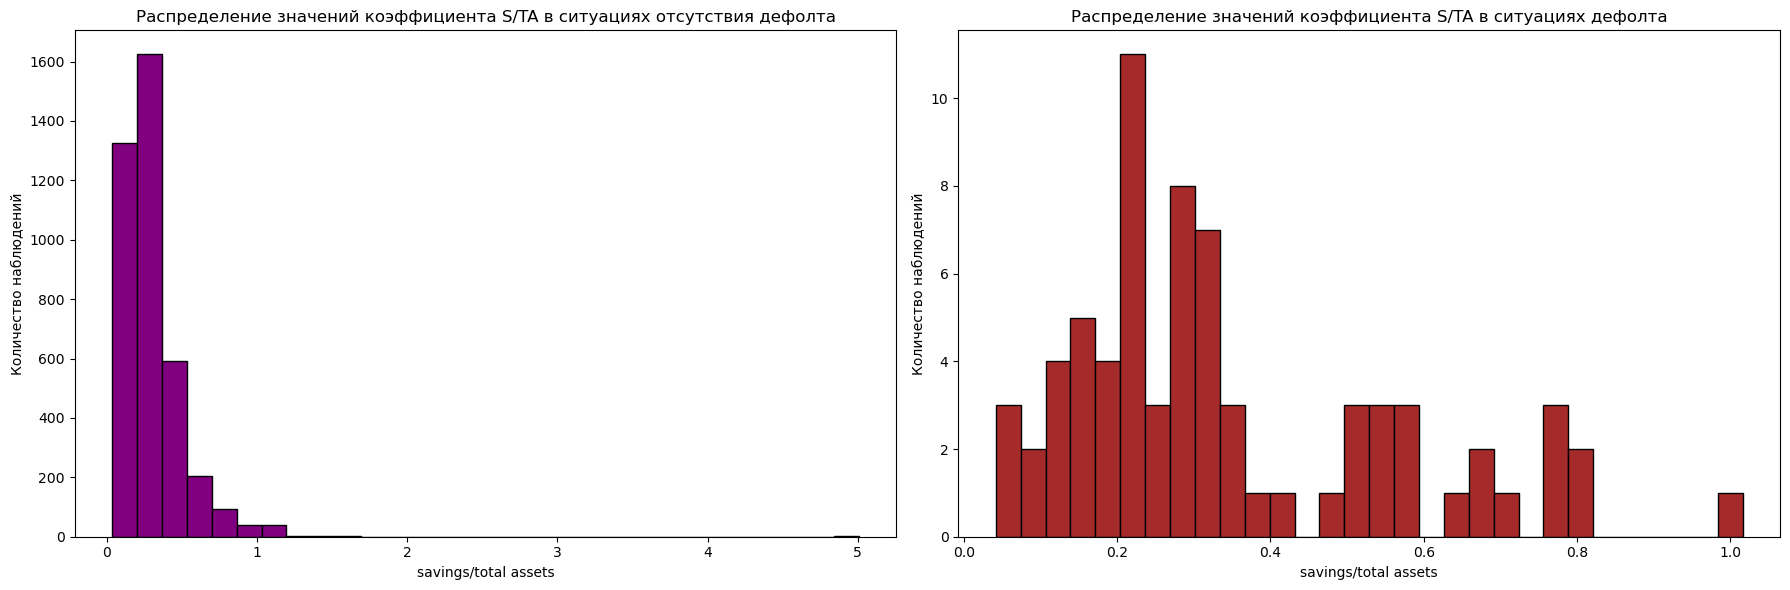

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
 
axes[0].hist(df[df['Default']==0]['S/TA'], bins=30, color='purple', edgecolor='black')
axes[0].set_title('Распределение значений коэффициента S/TA в ситуациях отсутствия дефолта')
 
axes[1].hist(df[df['Default']==1]['S/TA'], bins=30, color='brown', edgecolor='black')
axes[1].set_title('Распределение значений коэффициента S/TA в ситуациях дефолта')
 
for ax in axes:
    ax.set_xlabel('savings/total assets')
    ax.set_ylabel('Количество наблюдений')
 
plt.tight_layout()
plt.show()

In [17]:
df.loc[df['Default'] == 0, 'S/TA'].mean()

0.3028866667260692

In [18]:
df.loc[df['Default'] == 1, 'S/TA'].mean()

0.34539172638888893

Судя по гистограммам распределения коэффициента S/TA, этот коэффициент не оказывает существенного влияния на вероятность дефолта.

# Корреляционный анализ

In [19]:
df.corr()

,ID,Year,Default,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
ID,1.000000,-0.254417,0.176423,0.024024,-0.065926,-0.027896,-0.086105,0.087327
Year,-0.254417,1.000000,-0.059829,-0.059384,0.035024,-0.030853,-0.032546,-0.083689
Default,0.176423,-0.059829,1.000000,-0.069606,-0.219986,-0.142317,-0.066827,0.027463
WC/TA,0.024024,-0.059384,-0.069606,1.000000,0.197591,0.181370,0.206344,0.247285
RE/TA,-0.065926,0.035024,-0.219986,0.197591,1.000000,0.329396,0.237152,0.080836
EBIT/TA,-0.027896,-0.030853,-0.142317,0.181370,0.329396,1.000000,0.284614,0.251476
ME/TL,-0.086105,-0.032546,-0.066827,0.206344,0.237152,0.284614,1.000000,0.001656
S/TA,0.087327,-0.083689,0.027463,0.247285,0.080836,0.251476,0.001656,1.000000


Для удобства восприятия построим heatmap:

<Axes: >

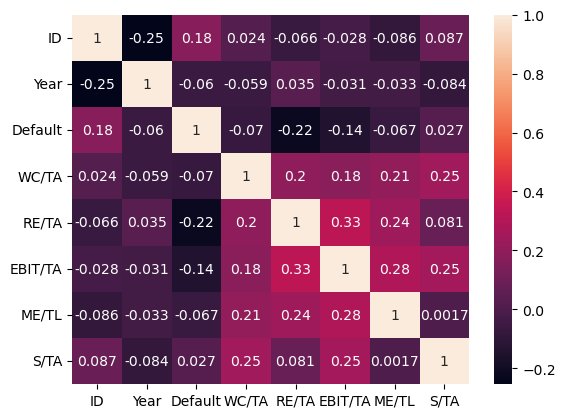

In [20]:
sns.heatmap(df.corr(), annot=True)

Анализируя корреляции между целевой переменной и признаками можно сделать следующие выводы:

1) Наибольшая степень связи вероятность дефолта с **коэффициентом RE/TA**. В дальнейшем анализе этому признаку будем уделять большое внимание.

2) **Коэффициент EBIT/TA** также сильно влияет на целевую переменую.

3) Корреляции остальных коэфициентов с таргетом как минимум в 2 раза меньше.

# Логистическая регрессия

Построим модель логистической регрессии, которая будет предсказывать вероятность дефолта.

In [21]:
df.columns

Index(['ID', 'Year', 'Default', 'WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA'], dtype='object')

Столбец ID не является информативным для анализа, поэтому модель будем строить без его учёта.

In [66]:
from sklearn.model_selection import train_test_split

X1 = df[['Year', 'WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA']]
y1 = df['Default']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state=42, stratify=y1)

Отнормируем данные:

In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [68]:
scaler = StandardScaler()

X1_train = pd.DataFrame(scaler.fit_transform(X1_train), columns=X1.columns)
X1_test = pd.DataFrame(scaler.transform(X1_test), columns=X1.columns)

In [69]:
X1_train.head()

,Year,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
0,0.423503,1.526417,-0.910074,0.555067,0.322021,-0.789953
1,0.787123,-0.383461,0.371246,0.585944,-0.393978,0.447157
2,-1.394595,0.411499,-0.226983,0.150522,-0.522014,-0.373491
3,1.514363,-0.142515,0.577855,0.627531,-0.372912,0.342391
4,-1.394595,-0.188267,0.761547,0.832161,0.730696,-0.020749


Строим модель:

In [70]:
from sklearn.linear_model import LogisticRegression


lr1 =  LogisticRegression()


lr1.fit(X1_train, y1_train)

LogisticRegression()

In [71]:
lr1_pred = lr1.predict(X1_test)

In [72]:
from sklearn.metrics import (accuracy_score, auc, classification_report,
                             confusion_matrix, f1_score, roc_curve)
from sklearn.model_selection import cross_validate, train_test_split

In [73]:
print(classification_report(y1_test, lr1_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       786
           1       0.50      0.07      0.12        14

    accuracy                           0.98       800
   macro avg       0.74      0.54      0.56       800
weighted avg       0.98      0.98      0.98       800



In [74]:
confusion_matrix(y1_test, lr1_pred)

array([[785,   1],
       [ 13,   1]], dtype=int64)

Такая модель очень плохо предсказывает положительный класс. Я пришёл к вывод, что это происходит из-за существенного дисбаланса классов. Поэтому я сократил обучающую выборку для балансировки классов и построил новую модель.

In [75]:
from imblearn.under_sampling import RandomUnderSampler

# Создаю экземпляр RandomUnderSampler
rus = RandomUnderSampler()

# Применяю уменьшение выборки к данным
X1_new, y1_new = rus.fit_resample(X1, y1)

In [76]:
X1new_train, X1new_test, y1new_train, y1new_test = train_test_split(X1_new, y1_new, test_size = 0.25, random_state=42, stratify=y1_new)

In [77]:
scaler1 = StandardScaler()

X1new_train = pd.DataFrame(scaler1.fit_transform(X1new_train), columns=X1_new.columns)
X1new_test = pd.DataFrame(scaler1.transform(X1new_test), columns=X1_new.columns)

In [78]:
mod_new = LogisticRegression()


mod_new.fit(X1new_train, y1new_train)


mod_new_pred = mod_new.predict(X1new_test)

In [79]:
print(classification_report(y1new_test, mod_new_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.88      0.78      0.82        18

    accuracy                           0.83        36
   macro avg       0.84      0.83      0.83        36
weighted avg       0.84      0.83      0.83        36



In [80]:
confusion_matrix(y1new_test, mod_new_pred)

array([[16,  2],
       [ 4, 14]], dtype=int64)

Качество модели значительно улучшилось.

Рассчитаем ROC-AUC модели и построим его график в сравнении со случайным классификатором

In [81]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_auc_new = roc_auc_score(y1new_test, mod_new_pred)

roc_auc_new

0.8333333333333333

C:\Users\Gavrin Gleb\AppData\Local\Temp\ipykernel_5892\2269618362.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--',


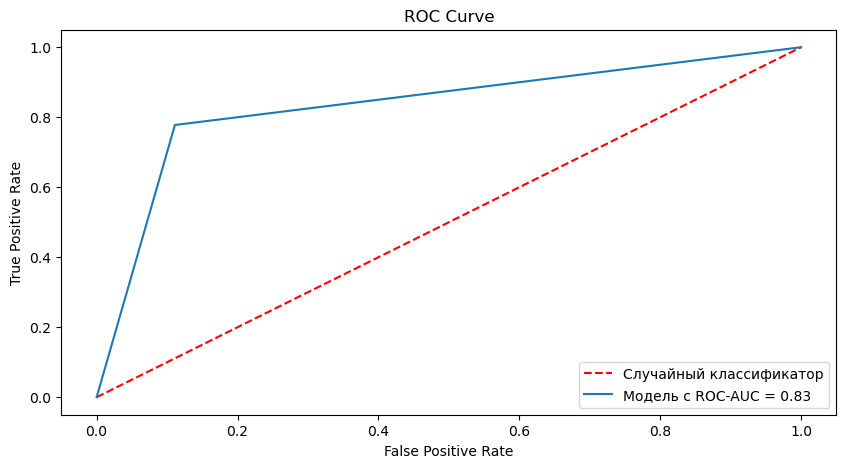

In [82]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))

fpr1, tpr1, thresholds1 = roc_curve(y1new_test, mod_new_pred, pos_label=1) 


d = {1: [(fpr1, tpr1), roc_auc_new, 'b']}

plt.plot([0, 1], [0, 1], 'k--',
         label='Cлучайный классификатор',
         color = 'r', )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

for k,v in d.items():
  plt.plot(v[0][0], v[0][1],
           label=f'Модель c ROC-AUC = 0.83')
plt.legend(loc="lower right")

Видим, что наша модель намного лучше случайного классификатора

Выведем **коэффициенты логистической регрессии**:

In [83]:
mod_new.coef_ #коэффициенты перед признаками

array([[-0.16791317,  0.29429062, -2.27468564, -1.43183472, -0.44999585,
         0.5319298 ]])

In [84]:
print(mod_new.intercept_)  #свободный коэффициент

[0.33058556]


# Расчёт значимости коэффициентов (p-value)

Так как в sklearn нет встроенной функции для расчёта p-value, я реализую аналогичную регрессию в statsmodels и возьму p-value из неё

In [85]:
import statsmodels.api as sm
y1new_train_list = list(y1new_train)
log_reg_sm = sm.OLS(y1new_train_list, sm.add_constant(X1new_train)).fit()

In [86]:
print(log_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     10.87
Date:                Thu, 23 May 2024   Prob (F-statistic):           2.61e-09
Time:                        22:02:28   Log-Likelihood:                -51.477
No. Observations:                 108   AIC:                             117.0
Df Residuals:                     101   BIC:                             135.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5000      0.039     12.893      0.0

**Интерпретация p-value**

Как правило, если для признака (P > |t|) < 0.05 , то гипотеза о важности признака принимается. В данной модели важными будут показатели Year, RE/TA и ME/TL.

## Улучшенная модель

Мне кажется, что можно добиться лучшего качества прогнозов. Попробуем использовать регуляризацию из GridSearchCV:

In [87]:
param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [100,1000,2500,5000]
}
]

In [88]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mod_new,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)
clf

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [89]:
best_clf = clf.fit(X1_new,y1_new)
best_clf.best_estimator_

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solve

LogisticRegression(C=3792.690190732246, max_iter=5000, penalty='l1',
                   solver='liblinear')

In [90]:
best_clf_pred = best_clf.predict(X1new_test)

In [91]:
print(classification_report(y1new_test, best_clf_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        18
           1       0.80      0.89      0.84        18

    accuracy                           0.83        36
   macro avg       0.84      0.83      0.83        36
weighted avg       0.84      0.83      0.83        36



In [92]:
confusion_matrix(y1new_test, best_clf_pred)

array([[14,  4],
       [ 2, 16]], dtype=int64)

Модель получилась примерно такая же по качеству

# Расчёт вероятности дефолта для каждого объекта

In [93]:
prob_predictions = best_clf.predict_proba(X1)

In [94]:
prob_predictions

array([[0.72403919, 0.27596081],
       [0.79430843, 0.20569157],
       [0.56626444, 0.43373556],
       ...,
       [0.24175687, 0.75824313],
       [0.05731966, 0.94268034],
       [0.39681426, 0.60318574]])

Теперь добавим в исходный датафрейм столбец с вероятностями дефолта 

In [95]:
default_prob = prob_predictions[:, 1]

In [96]:
default_prob

array([0.27596081, 0.20569157, 0.43373556, ..., 0.75824313, 0.94268034,
       0.60318574])

In [97]:
df['Default_Prob'] = default_prob.tolist()

In [98]:
df

,ID,Year,Default,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA,Default_Prob
0,1,1999,0,0.500799,0.306846,0.043373,0.956271,0.334774,0.275961
1,1,2000,0,0.547780,0.322214,0.051843,1.064545,0.334591,0.205692
2,1,2001,0,0.451001,0.225150,0.026813,0.804096,0.245585,0.433736
3,1,2002,0,0.306887,0.191936,0.030058,0.387010,0.253438,0.443152
4,1,2003,0,0.447246,0.217368,0.032458,0.791639,0.275531,0.423231
...,...,...,...,...,...,...,...,...,...
3995,826,1997,1,0.028728,-1.846117,0.033956,0.034680,0.678044,0.999997
3996,827,2000,1,0.172167,-0.068613,-0.004699,0.043519,0.235299,0.921015
3997,828,1996,1,0.005588,-0.260068,0.036878,0.298255,0.148100,0.758243
3998,829,2001,1,-0.994230,-0.433532,-0.000244,0.035502,0.330467,0.942680


В такой задаче качество модели можно оценить с помощью построения гистограммы распределения вероятностей для объектов с дефолтом и без дефолта.

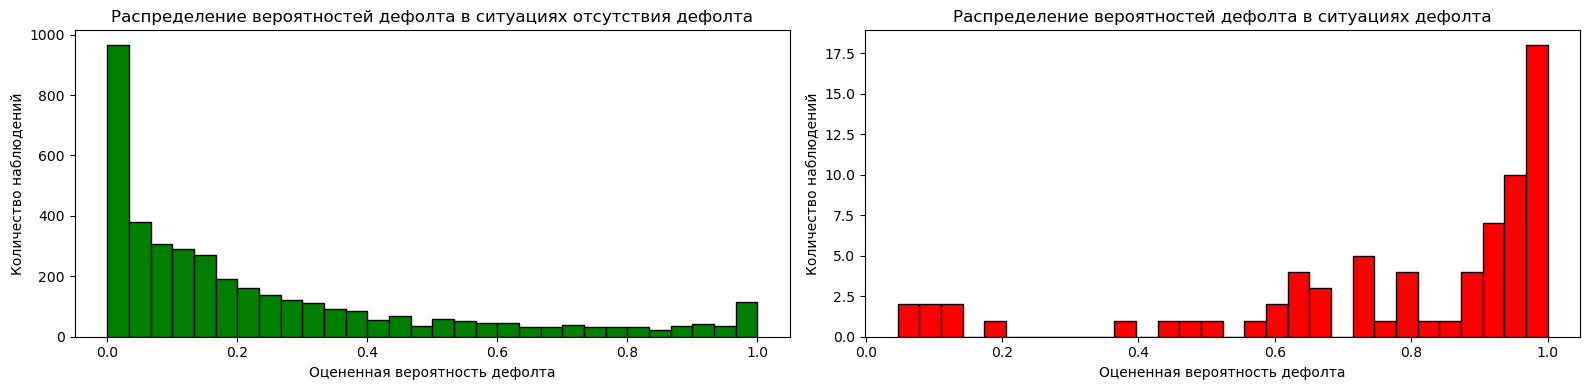

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
 
axes[0].hist(df[df['Default']==0]['Default_Prob'], bins=30, color='green', edgecolor='black')
axes[0].set_title('Распределение вероятностей дефолта в ситуациях отсутствия дефолта')
 
axes[1].hist(df[df['Default']==1]['Default_Prob'], bins=30, color='red', edgecolor='black')
axes[1].set_title('Распределение вероятностей дефолта в ситуациях дефолта')
 
for ax in axes:
    ax.set_xlabel('Оцененная вероятность дефолта')
    ax.set_ylabel('Количество наблюдений')
 
plt.tight_layout()
plt.show()

Судя по гистограммам, модель хорошо предсказывает вероятность дефолта.

Я подумал, что такую модель можно оценить с помощью доли ошибок для установленного критичного порога вероятности дефолта.

# Выводы об эффективности модели

Пусть создатели прогнозной модели полагают, что если оцененная вероятность дефолта <= 0.5 , то модель должна ошибаться не более чем в 5% случаях.

Посмотрим долю таких ошибок у нашей модели:

In [114]:
df.loc[((df['Default'] == 1) & (df['Default_Prob' ] <= 0.5))]

,ID,Year,Default,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA,Default_Prob
106,21,1996,1,0.357301,0.060466,0.028341,3.196286,0.283511,0.390325
659,126,2004,1,0.157971,0.108848,0.074834,1.363119,0.397758,0.175593
2703,474,2001,1,-0.054136,-0.030314,0.029028,0.089803,0.107099,0.486383
3069,530,2000,1,0.184684,0.592574,0.030806,0.203093,0.272307,0.069855
3429,593,1997,1,0.339660,0.171137,0.095746,0.160332,0.776003,0.453489
3932,707,1995,1,0.141552,0.194191,0.051926,1.939260,0.305793,0.137419
3933,708,1997,1,0.131458,0.201243,0.056276,1.958129,0.291079,0.105493
3946,753,2000,1,0.131888,0.198402,0.058867,1.934929,0.298211,0.101631
3947,755,2001,1,0.143223,0.207743,0.050891,1.937747,0.297205,0.129192
3963,791,1997,1,0.381472,0.092574,0.056435,6.197883,0.284874,0.046656


In [112]:
len(df.loc[((df['Default'] == 1) & (df['Default_Prob' ] <= 0.5))])

10

In [113]:
df.loc[((df['Default'] == 0) & (df['Default_Prob' ] <= 0.5))]

,ID,Year,Default,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA,Default_Prob
0,1,1999,0,0.500799,0.306846,0.043373,0.956271,0.334774,0.275961
1,1,2000,0,0.547780,0.322214,0.051843,1.064545,0.334591,0.205692
2,1,2001,0,0.451001,0.225150,0.026813,0.804096,0.245585,0.433736
3,1,2002,0,0.306887,0.191936,0.030058,0.387010,0.253438,0.443152
4,1,2003,0,0.447246,0.217368,0.032458,0.791639,0.275531,0.423231
...,...,...,...,...,...,...,...,...,...
3958,782,1995,0,0.141166,0.218147,0.055609,1.950674,0.305347,0.106696
3959,782,1996,0,0.139405,0.214003,0.060391,1.943807,0.298324,0.089585
3960,786,1997,0,0.155179,0.217222,0.045847,1.952065,0.318078,0.159869
3961,787,1998,0,0.140064,0.211415,0.047954,1.938603,0.297971,0.139753


In [115]:
len(df.loc[((df['Default'] == 0) & (df['Default_Prob' ] <= 0.5))])

3275

In [118]:
a = 10/3285
print(f'Модель ошибается, прогнозируя вероятность дефолта <= 0.5, в {round(a*100, 2)}% случаев')

Модель ошибается, прогнозируя вероятность дефолта <= 0.5, в 0.3% случаев


Я оценил именно вероятность такой ошибки, так как если модель прогнозирует, что дефолта не будет, а он случается, это значит, что она не будет эффективна в использовании финансовым институтом, так как риски такой ошибки очень высоки.

In [ ]:
Наша модель допускает такую ошибку в примерно 0.3% случаев, что говорит о высоком качестве модели.